# Applying Machine Learning to a Hepatitis C Egyptian Cohort Dataset for Predicting the Disease Stage - Experiment 1

### four-class prediction
#### Predicting with multi-class variables (<font color="red">F1=1, F2=2, F3=3, and F4=4</font>) with Age, BMI, AST1, ALT1, Plat and WBC

In [1]:
import import_ipynb

In [2]:
from CommonUtilsHCV import *

importing Jupyter notebook from CommonUtilsHCV.ipynb


In [ ]:
# # Algorithms
# models = []
# models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
# models.append(('XGBOOST', XGBClassifier(max_depth=5, number_of_estimators=40, learning_rate=0.01, nthread=4)))
# models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
# models.append(('CART', DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, 
#  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#  max_features=None, random_state=None, max_leaf_nodes=None)))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto')))
# models.append(('RF', RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1)))
# models.append(('NN', MLPClassifier()))

In [3]:
test_v("Aravind..")

Aravind..


#### Dataset downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/00503/

In [4]:
data = pd.read_excel(r"HCV_Egy_data_for_loading.xlsx")

In [5]:
print("number of observations in data:", " ", data.shape)

number of observations in data:   (1385, 29)


In [6]:
data["BHS"].value_counts(sort=0)

1    336
2    332
3    355
4    362
Name: BHS, dtype: int64

In [7]:
# data_tmp = data.copy()
# y = data_tmp["BHS"]
# X = data_tmp.loc[:, data_tmp.columns.isin(["Age","AST1", "ALT1", "Plat", "WBC", "BMI"])]
# X = scaler.fit_transform(X.to_numpy())

In [42]:
# Split data for training and testing
data_lists = []
X,y = standard_scaler(dataframe=data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

data_lists = [X_train, y_train, X_test, y_test]
label_names = y_train.unique()

In [95]:
def get_the_best_values_RandomForest(data_list, labels):
    X_trn = data_list[0]
    y_trn = data_list[1]
    X_tst = data_list[2]
    y_tst = data_list[3]
    param_grid = {'n_estimators': range(1, 50, 1),
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth' : [4,5,6,7,8],
                  'criterion' :['gini', 'entropy'],
                  'oob_score': [True]
                 }
    rfc = RandomForestClassifier()
    clf = GridSearchCV(estimator=rfc, param_grid=param_grid)
    clf.fit(X_trn, y_trn)
    y_pred = clf.predict(X_tst)
    print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
    print("*********** Calculating Evaluation Metrics ********")
    evaluate_metrics(y_test=y_tst, y_pred=y_pred)
    print("*********** ****************** ********************")
    
    plot_fucntion(y_tst,y_pred=y_pred ,label_names=labels)
#     best_parameter = best_model.best_params_
#     return clf

In [96]:
def evaluate_metrics(y_test, y_pred):
#     print("Model:", '%s' % (name))    
#   Confusion matrix, Accuracy, sensitivity and specificity
    cm1 = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix : \n', cm1)
     
#     total1=sum(sum(cm1))
#    

#   from confusion matrix calculate accuracy, sensitivity, specificity and auc_roc
#     accuracy1=(cm1[0,0]+cm1[1,1])/total1
#     print ('Accuracy : ', accuracy1)
#     sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
#     print('Sensitivity : ', sensitivity1 )
#     specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
#     print('Specificity : ', specificity1)

In [97]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment="center", # added this
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [98]:
# y_pred = model.predict(x_test);
import itertools
def plot_fucntion(y_test, y_pred, label_names):
    cnf_matrix = cm1 = confusion_matrix(y_test, y_pred)

    # Plot normalized confusion matrix
    fig = plt.figure()
    fig.set_size_inches(6, 4, forward=True)
#     fig.set_size_inches(15, 10, forward=True)

    #fig.align_labels()

    # fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
    plot_confusion_matrix(cnf_matrix, classes=np.asarray(label_names), normalize=True,
                          title='Normalized confusion matrix')


Accuracy Score: 0.24759615384615385
*********** Calculating Evaluation Metrics ********
Confusion Matrix : 
 [[18 15  8 54]
 [15 11 14 58]
 [29 15 11 64]
 [16 12 13 63]]
*********** ****************** ********************
Normalized confusion matrix


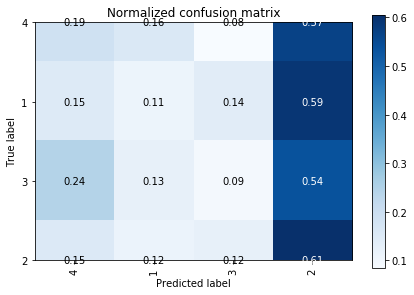

In [99]:
get_the_best_values_RandomForest(data_list=data_lists, labels=label_names)

In [ ]:
# evaluate each model in turn
for name, model in models:     
#    Make predictions on validation dataset  
     model.fit(X_train, y_train)
     y_pred = model.predict(X_test)    

#    Evaluate predictions
     print("Model:", '%s' % (name))    
    
#    Confusion matrix, Accuracy, sensitivity and specificity
     cm1 = confusion_matrix(y_test, y_pred)
     print('Confusion Matrix : \n', cm1)
     
     total1=sum(sum(cm1))
#    from confusion matrix calculate accuracy, sensitivity, specificity and auc_roc
     accuracy1=(cm1[0,0]+cm1[1,1])/total1
     print ('Accuracy : ', accuracy1)
     sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
     print('Sensitivity : ', sensitivity1 )
     specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
     print('Specificity : ', specificity1)
     #roc1 = roc_auc_score(y_test, y_pred)
     #print('ROC AUC score : ', roc1)
     print("\n") 